In [1]:
# BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import numpy as np

In [2]:
#PUXANDO OS DADOS DO ARQUIVO CSV
df = pd.read_csv("C:/Users/Nicolas Lessa/TRABALHOS EM PYTHON/Trabalho Temp/SAMeT_CPTEC_T_2000/SAMeT_CPTEC_TMAX_20000101.csv")

In [3]:
#DESCRIÇÃO DOS DADOS
df["value"].describe()

count    539800.000000
mean         29.707003
std           4.419728
min           5.600000
25%          28.100000
50%          30.500000
75%          32.500000
max          41.400000
Name: value, dtype: float64

In [4]:
#CRIAÇÃO DOS PONTOS PARA COLOCAR NO MAPA
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#MAPA BASE
mapa = gpd.read_file("C:/Users/Nicolas Lessa/TRABALHOS EM PYTHON/Trabalho Temp/bcim_2016_21_11_2018.gpkg", layer = "lim_unidade_federacao_a")

In [5]:
#PLANILHA COM OS DADOS
gdf

lat   long  value              geometry
0      -6.95 -80.00   28.1     POINT (-80 -6.95)
1      -6.90 -80.00   28.0      POINT (-80 -6.9)
2      -6.85 -80.00   28.0     POINT (-80 -6.85)
3      -6.80 -80.00   28.0      POINT (-80 -6.8)
4      -6.75 -80.00   28.0     POINT (-80 -6.75)
...      ...    ...    ...                   ...
539795 -7.00 -34.85   31.0     POINT (-34.85 -7)
539796 -7.35 -34.80   31.0   POINT (-34.8 -7.35)
539797 -7.30 -34.80   31.0    POINT (-34.8 -7.3)
539798 -7.35 -34.75   31.0  POINT (-34.75 -7.35)
539799 -7.30 -34.75   31.0   POINT (-34.75 -7.3)

[539800 rows x 4 columns]

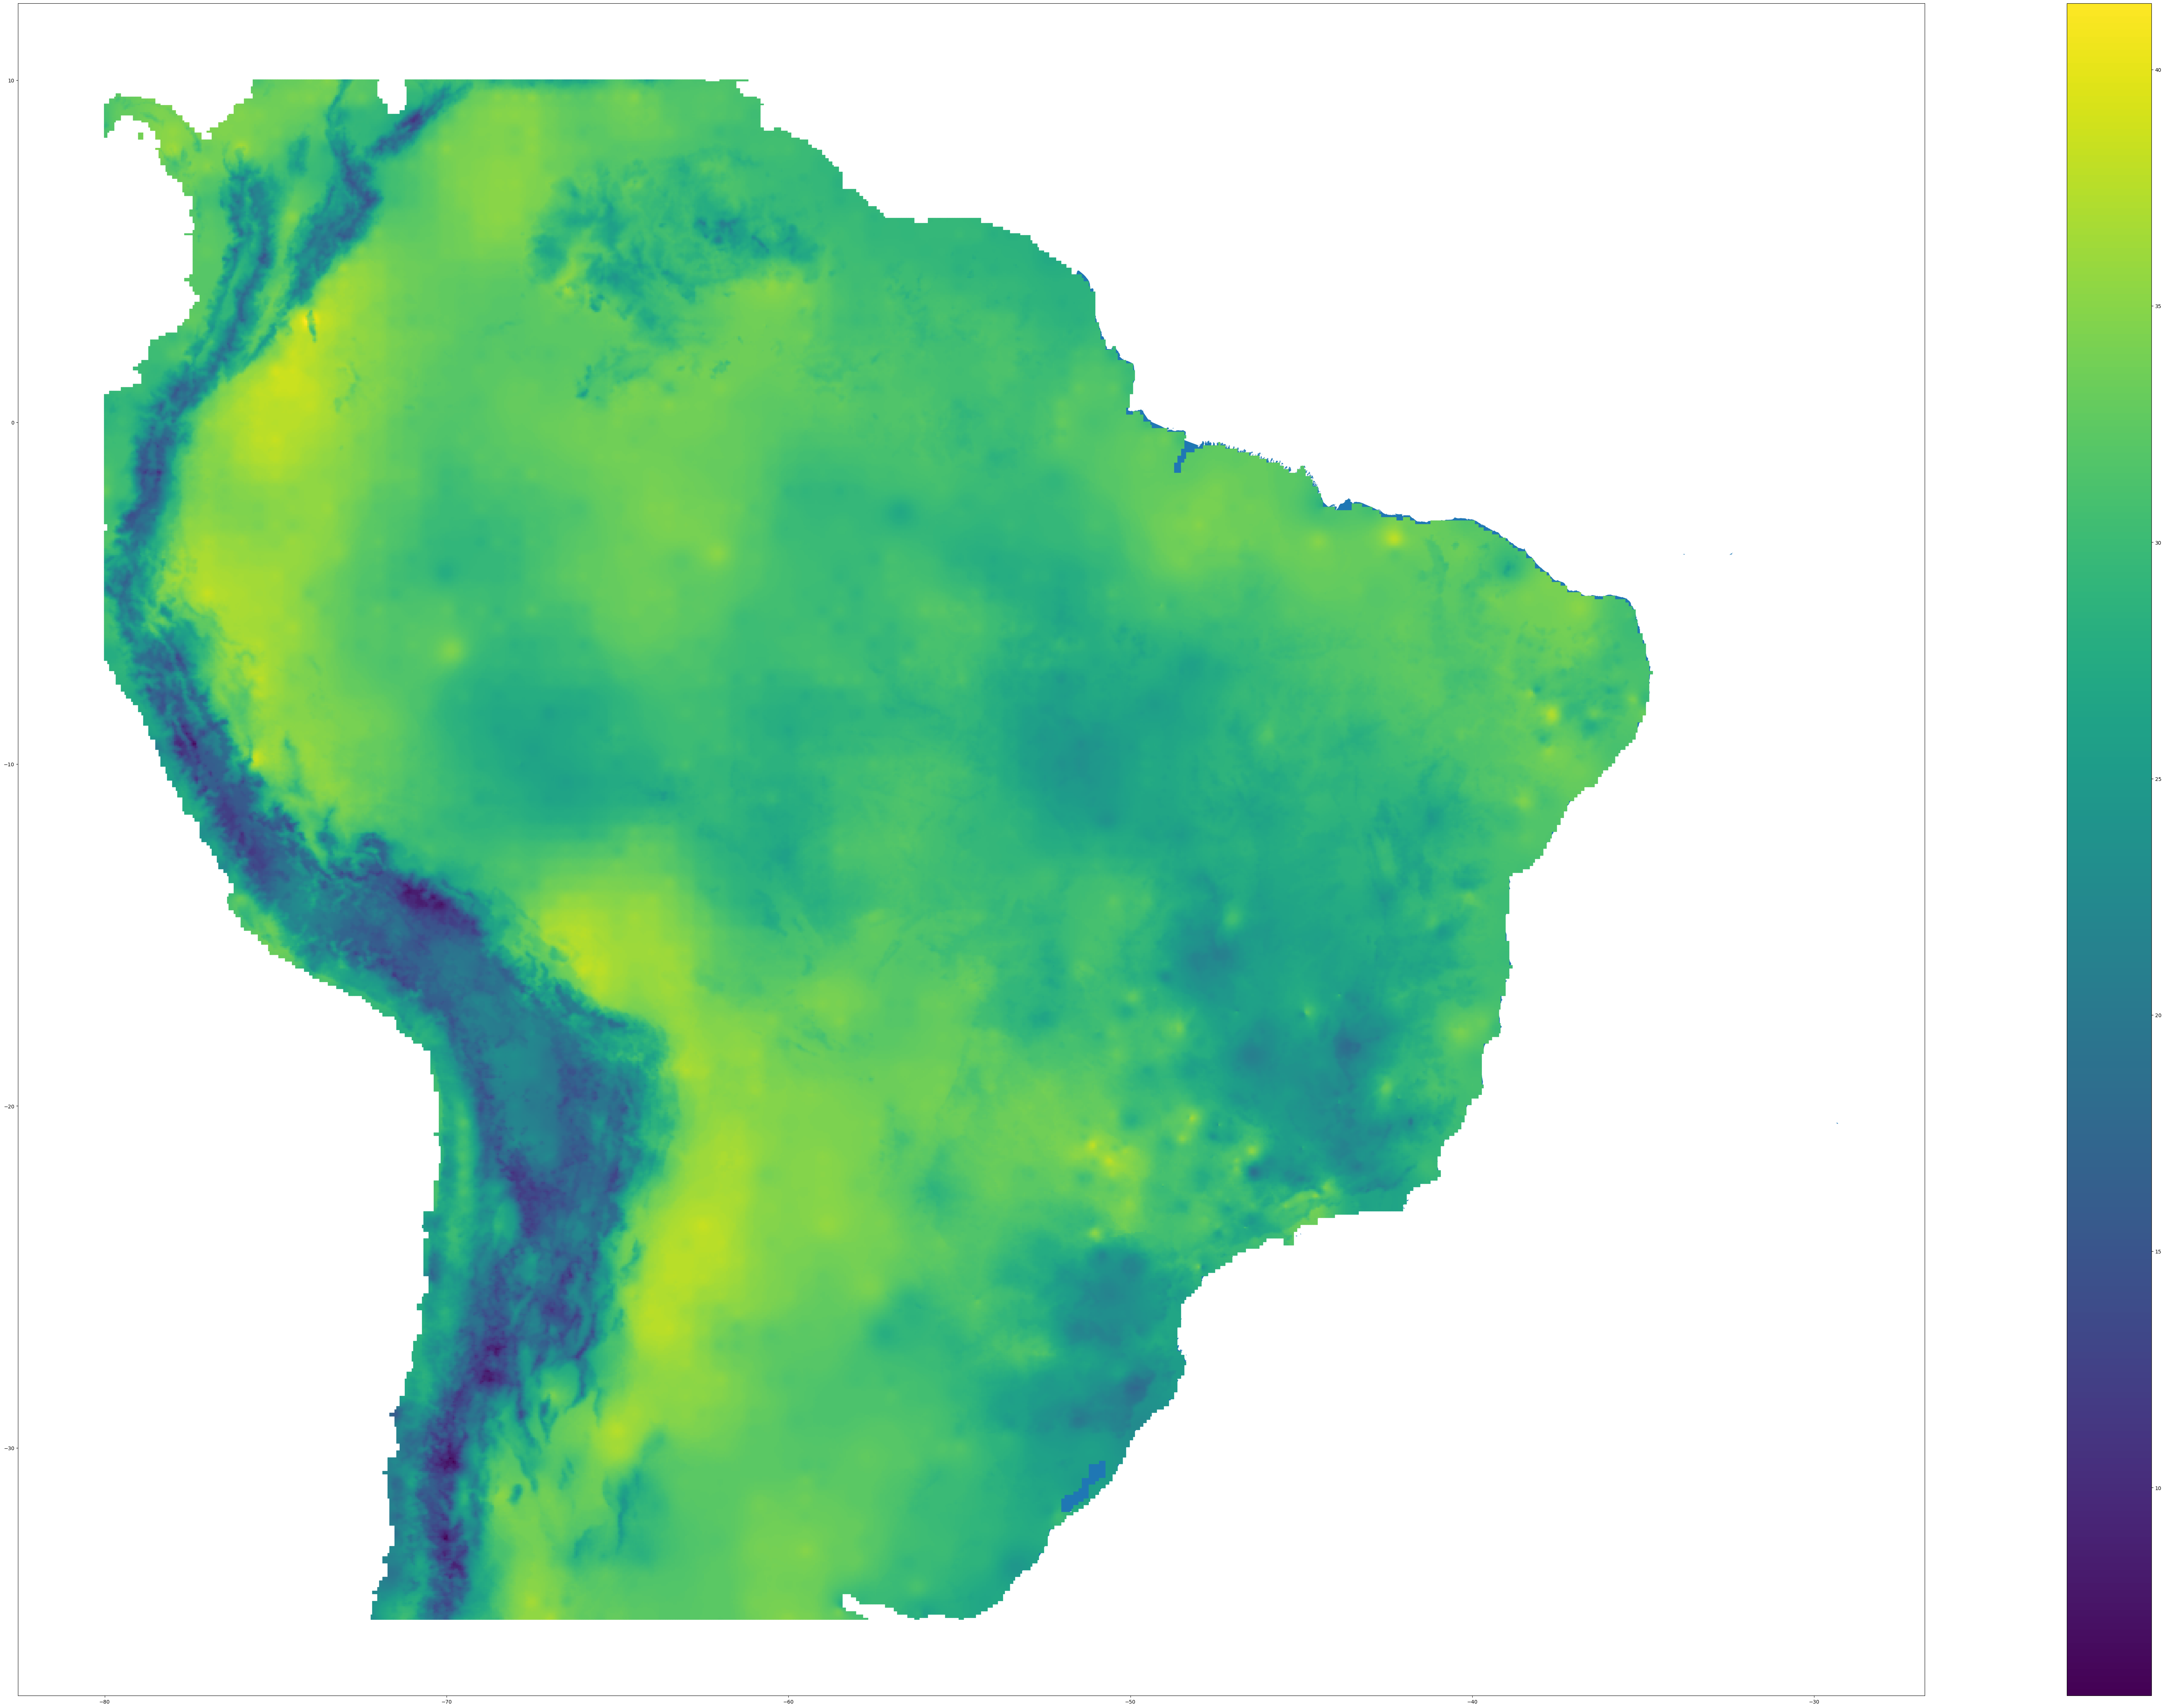

In [6]:
#MAPA
mapa_T = gdf.plot(ax=mapa.plot(figsize=(100, 60)), legend=True, column = "value",marker = "s", markersize=7)

In [7]:
#PLANILHA COM AS COORDENADAS QUE ENQUADRAM DAS PRINCIPAIS CIDADES
df_coord = pd.read_excel("C:/Users/Nicolas Lessa/TRABALHOS EM PYTHON/Trabalho Temp/Coordenadas cidades populosas.xlsx")
df_coord.head()

MUNICÍPIO             ESTADO         POP  \
0        São Paulo          São Paulo  11 451 999   
1   Rio de Janeiro     Rio de Janeiro   6 211 223   
2         Brasília   Distrito Federal   2 817 381   
3        Fortaleza              Ceará   2 428 708   
4         Salvador              Bahia   2 417 678   

                                   COORD 1  \
0   -23.33943790851834, -46.91104481216372   
1  -22.752416655743705, -43.15423819371168   
2  -15.593182405032644, -48.13389376516615   
3    -3.674346226631986, -38.6537399894331   
4  -12.761118782341404, -38.51222271191272   

                                   COORD 2  \
0   -23.36097203431144, -46.33582716968872   
1   -22.81635628372483, -43.79075854582212   
2  -15.891051951068073, -48.01875828916434   
3   -3.899632954108398, -38.63945012532653   
4  -12.89836683049864, -38.287003002943855   

                                   COORD 3  \
0   -23.94379804612871, -46.31816011157483   
1   -23.07244582402719, -43.77221912081229   
2  -15.81564348335843, -47.796652973756615   
3  -3.857676244544769, -38.366309581194606   
4  -13.032194854893966, -38.45935101194137   

                                    COORD 4  
0  -23.988974128628943, -46.872969638546905  
1   -23.036432921765744, -43.09244009725762  
2  -15.563292861492931, -47.831765211118864  
3     -3.68534710894654, -38.43816718330207  
4    -12.97733407181532, -38.58569377550927

In [8]:
#FUNÇÃO QUE PARA REALIZAR O PLOT DOS QUADRADOS NO MAPA
cidadeX = []
cidadeY = []

for i in range(len(df_coord)):
    #SEPARANDO OS Xs e Ys DAS COORDENADAS
    x1 = df_coord["COORD 1"][i].split(",")[1]
    y1 = df_coord["COORD 1"][i].split(",")[0]
    x2 = df_coord["COORD 2"][i].split(",")[1]
    y2 = df_coord["COORD 2"][i].split(",")[0]
    x3 = df_coord["COORD 3"][i].split(",")[1]
    y3 = df_coord["COORD 3"][i].split(",")[0]
    x4 = df_coord["COORD 4"][i].split(",")[1]
    y4 = df_coord["COORD 4"][i].split(",")[0]
    cidadeX.append([x1,x2,x3,x4])
    cidadeY.append([y1,y2,y3,y4])
    
print(cidadeX)
print(cidadeY)


[[' -46.91104481216372', ' -46.33582716968872', ' -46.31816011157483', ' -46.872969638546905'], [' -43.15423819371168', ' -43.79075854582212', ' -43.77221912081229', ' -43.09244009725762'], [' -48.13389376516615', ' -48.01875828916434', ' -47.796652973756615', ' -47.831765211118864'], [' -38.6537399894331', ' -38.63945012532653', ' -38.366309581194606', ' -38.43816718330207'], [' -38.51222271191272', ' -38.287003002943855', ' -38.45935101194137', ' -38.58569377550927'], [' -44.059514300556955', ' -43.84802750067155', ' -43.86382034611754', ' -44.070500627823726'], [' -60.12986063261237', ' -60.11750101443726', ' -59.81949688732601', ' -59.82087017823436'], [' -49.377021744239926', ' -49.15729519890444', ' -49.14356228923092', ' -49.40448756181681'], [' -35.02693576029003', ' -34.80995579677125', ' -34.92312598116205', ' -35.020069305748294'], [' -49.46621521327669', ' -49.14623843163191', ' -49.162031277185164', ' -49.465528567929795'], [' -51.22522584004663', ' -51.07210390376597', ' 

In [9]:
#DATAFRAME PARA CRIAR O GEODATAFRAME EM CIMA
df_cidades = pd.DataFrame(columns=["NaN"],index=range(len(df_coord)))

#DATAFRAMES COM AS COORDENADAS X E Y
df_cidadeX = pd.DataFrame(cidadeX,columns=["COORD1","COORD2","COORD3","COORD4"])
df_cidadeY = pd.DataFrame(cidadeY,columns=["COORD1","COORD2","COORD3","COORD4"])

#JUNTANDO OS PONTOS X E Y EM UM ÚNICO POINT, PARA O GEOMETRY
geometry1 = [Point(xy) for xy in zip(df_cidadeX['COORD1'], df_cidadeY['COORD1'])]
geometry2 = [Point(xy) for xy in zip(df_cidadeX['COORD2'], df_cidadeY['COORD2'])]
geometry3 = [Point(xy) for xy in zip(df_cidadeX['COORD3'], df_cidadeY['COORD3'])]
geometry4 = [Point(xy) for xy in zip(df_cidadeX['COORD4'], df_cidadeY['COORD4'])]

#CRIANDO UM GDF PARA CADA "QUINA" DO QUADRADO
gdf_cidade1 = GeoDataFrame(df_cidades, geometry=geometry1) #GEODATAFRAME SÓ ACEITA DATAFRAMES, POR ISSO PRECISAMOS TRANSFORMAR TUDO
gdf_cidade2 = GeoDataFrame(df_cidades, geometry=geometry2)
gdf_cidade3 = GeoDataFrame(df_cidades, geometry=geometry3)
gdf_cidade4 = GeoDataFrame(df_cidades, geometry=geometry4)

print(gdf_cidade1,gdf_cidade2,gdf_cidade3,gdf_cidade4)

    NaN                     geometry
0   NaN  POINT (-46.91104 -23.33944)
1   NaN  POINT (-43.15424 -22.75242)
2   NaN  POINT (-48.13389 -15.59318)
3   NaN   POINT (-38.65374 -3.67435)
4   NaN  POINT (-38.51222 -12.76112)
5   NaN  POINT (-44.05951 -19.77411)
6   NaN   POINT (-60.12986 -2.91231)
7   NaN  POINT (-49.37702 -25.34308)
8   NaN    POINT (-35.02694 -7.9236)
9   NaN  POINT (-49.46622 -16.56117)
10  NaN  POINT (-51.22523 -29.94826)
11  NaN   POINT (-48.39607 -1.19993)
12  NaN  POINT (-46.59315 -23.40786)
13  NaN  POINT (-47.23752 -22.72905)
14  NaN   POINT (-44.36647 -2.47769)
15  NaN   POINT (-35.53289 -9.45504)
16  NaN     POINT (-54.79005 -20.38)
17  NaN  POINT (-43.12246 -22.73269)
18  NaN  POINT (-43.12315 -22.72668)
19  NaN    POINT (-34.79818 -7.0461)
20  NaN   POINT (-35.15242 -5.70078)
21  NaN  POINT (-56.36862 -15.05167)
22  NaN  POINT (-36.97851 -10.85967)
23  NaN  POINT (-48.62691 -27.34455)
24  NaN   POINT (-63.94006 -8.69206)
25  NaN    POINT (-51.21792 0.26431)
2

In [10]:
#CRIANDO UM DATAFRAME PARA COLOCAR TODAS AS COORDENADAS DOS PONTOS DOS QUADRADOS
gdf_cidades = pd.concat([gdf_cidade1, gdf_cidade2, gdf_cidade3, gdf_cidade4], ignore_index=True)
#gdf_cidades

In [11]:
#cidadeX/y[ÍNDICE][COORDENADA 1,2,3,4 (0,1,2,3)]
#TRANSFORMANDO OS ELEMENTOS DAS LISTAS DE STR PARA FLOAT
for i in range(len(cidadeX)):
    for k in range(len(cidadeX[0])):
        cidadeX[i][k] = float(cidadeX[i][k])

for i in range(len(cidadeY)):
    for k in range(len(cidadeY[0])):
        cidadeY[i][k] = float(cidadeY[i][k])
cidadeX

[[-46.91104481216372,
  -46.33582716968872,
  -46.31816011157483,
  -46.872969638546905],
 [-43.15423819371168,
  -43.79075854582212,
  -43.77221912081229,
  -43.09244009725762],
 [-48.13389376516615,
  -48.01875828916434,
  -47.796652973756615,
  -47.831765211118864],
 [-38.6537399894331,
  -38.63945012532653,
  -38.366309581194606,
  -38.43816718330207],
 [-38.51222271191272,
  -38.287003002943855,
  -38.45935101194137,
  -38.58569377550927],
 [-44.059514300556955,
  -43.84802750067155,
  -43.86382034611754,
  -44.070500627823726],
 [-60.12986063261237,
  -60.11750101443726,
  -59.81949688732601,
  -59.82087017823436],
 [-49.377021744239926,
  -49.15729519890444,
  -49.14356228923092,
  -49.40448756181681],
 [-35.02693576029003,
  -34.80995579677125,
  -34.92312598116205,
  -35.020069305748294],
 [-49.46621521327669,
  -49.14623843163191,
  -49.162031277185164,
  -49.465528567929795],
 [-51.22522584004663,
  -51.07210390376597,
  -51.08721010220225,
  -51.25818482029142],
 [-48.39607

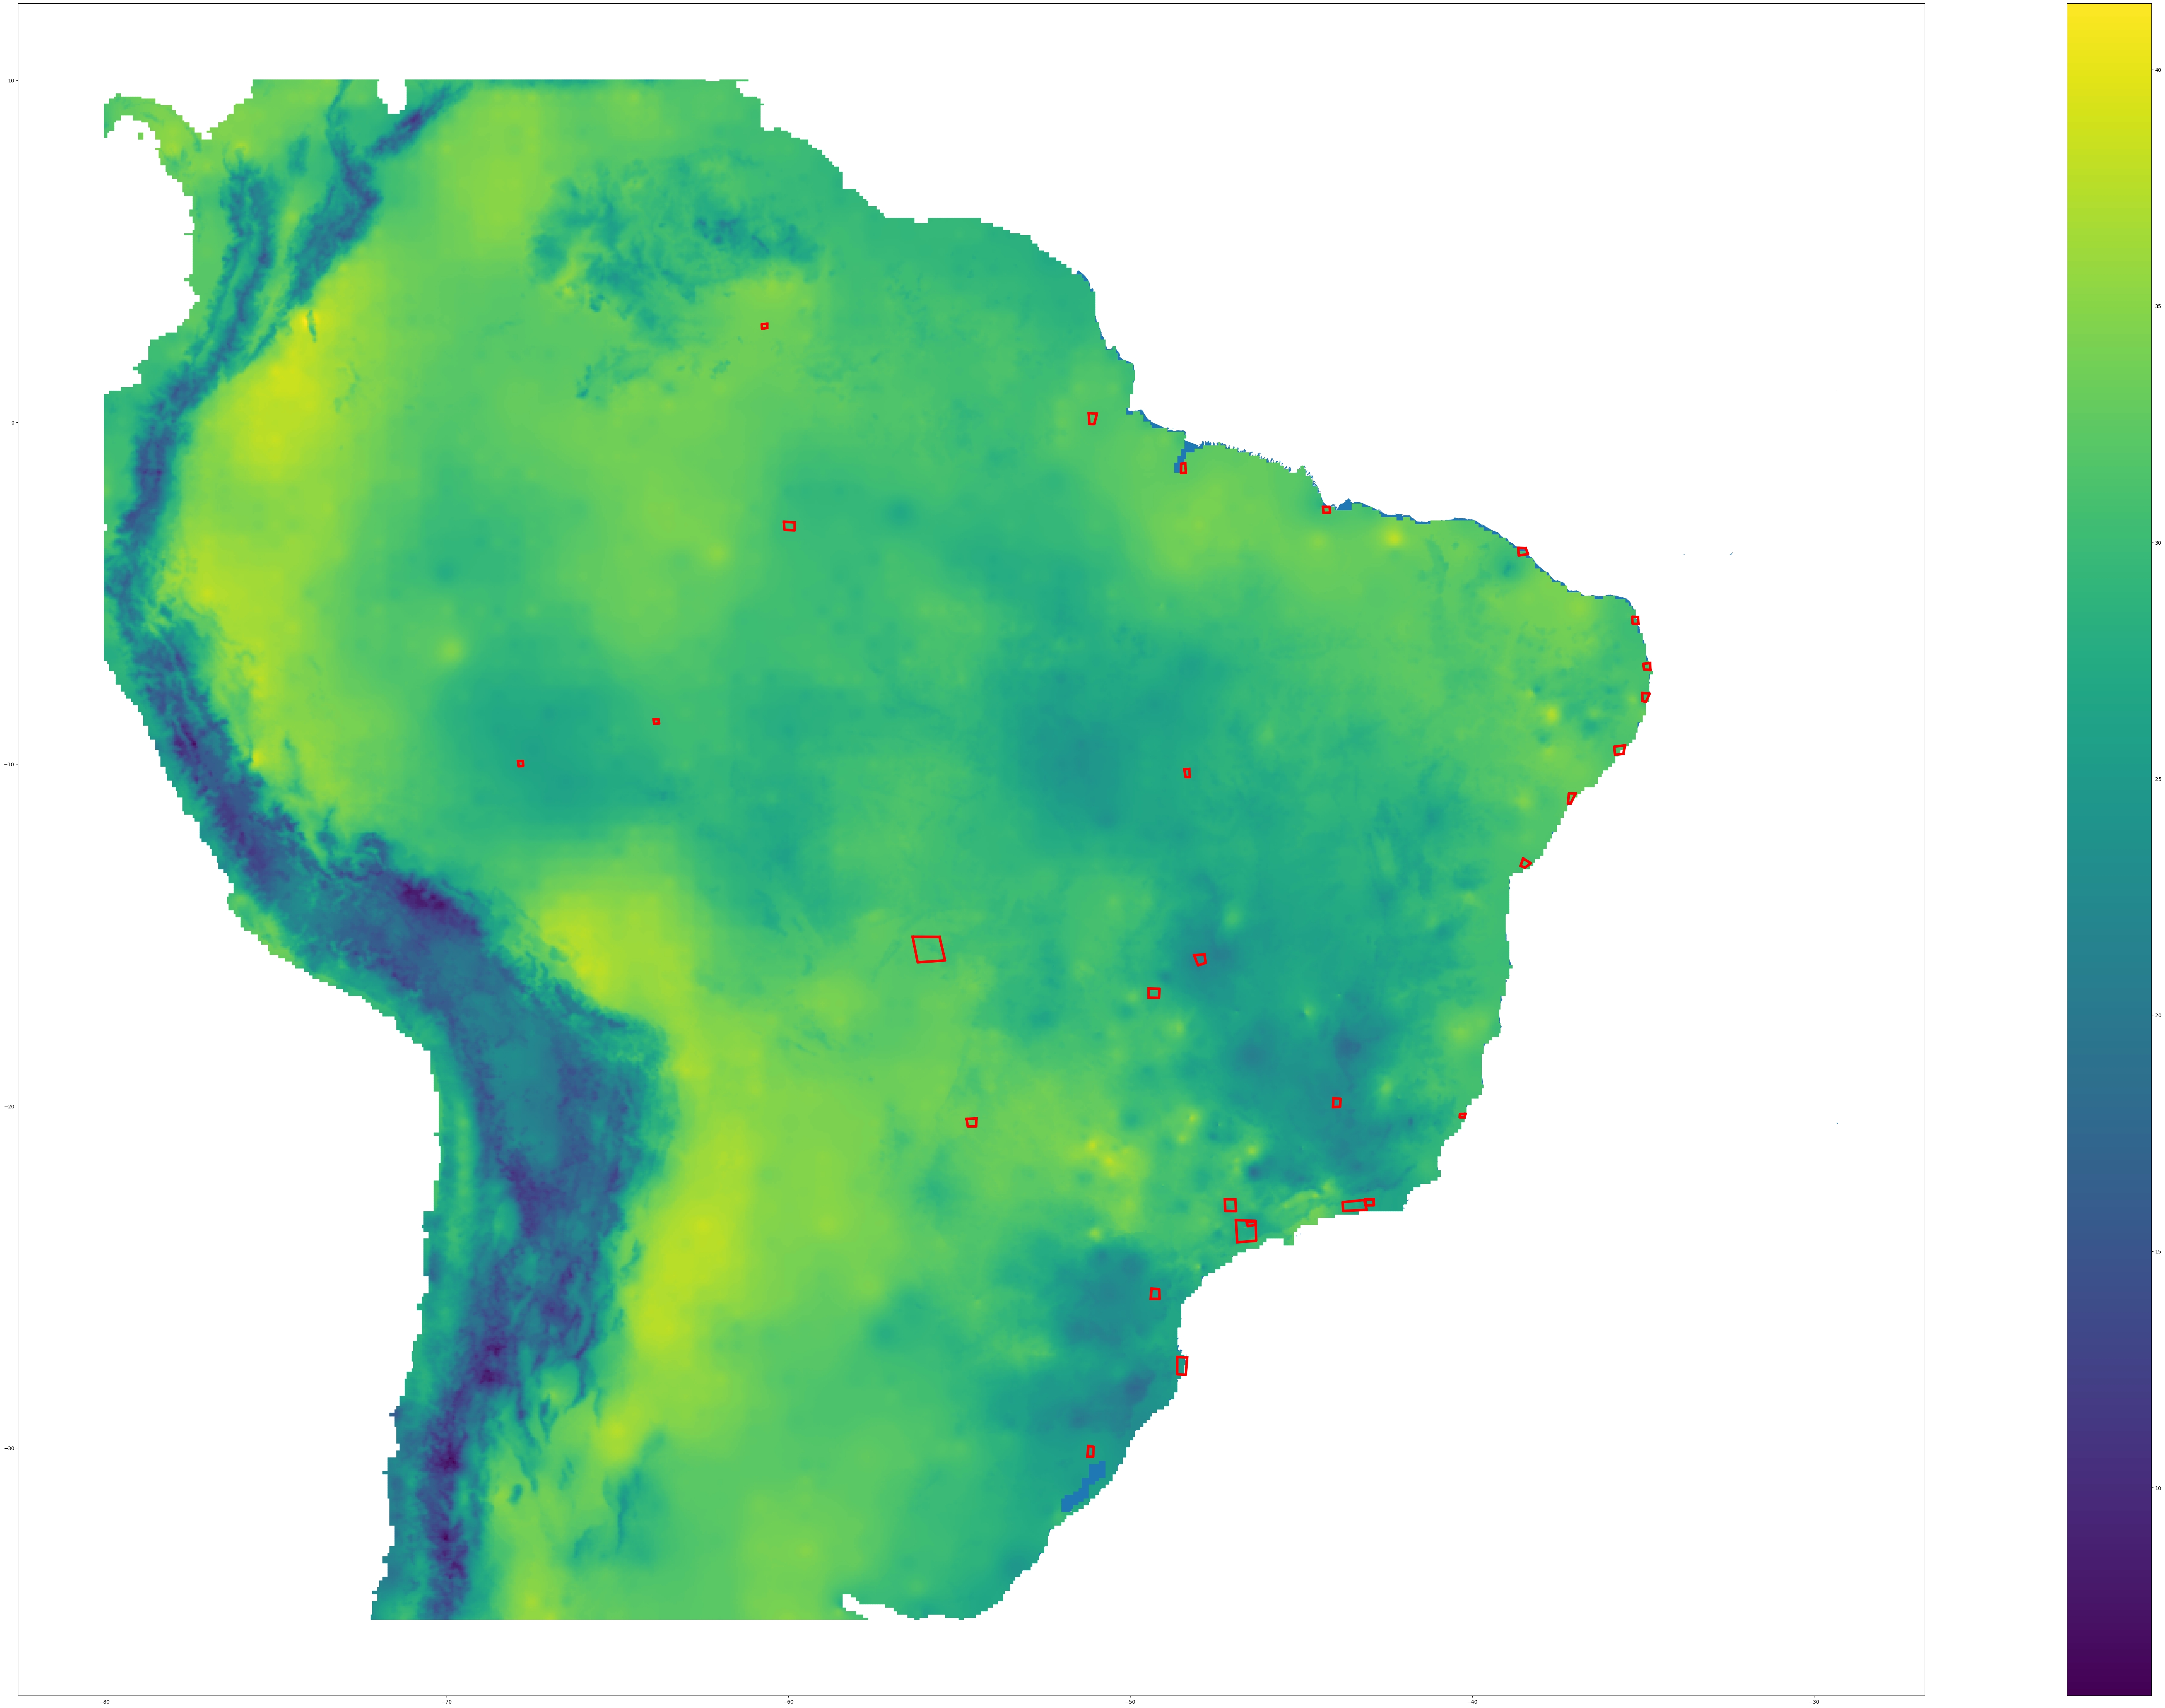

In [12]:
#MAPA COM AS DELIMITAÇÕES DAS CIDADES ANALISADAS
mapa_T = gdf.plot(ax=mapa.plot(figsize=(100, 60)), legend=True, column = "value",marker = "s", markersize=7)
for i in range(len(cidadeX)):
    #3 CONTORNOS DA LINHA DO QUADRADO
    plt.plot(cidadeX[i],cidadeY[i],linewidth= 5, color="red")
    #ÚLTIMO CONTORNO
    plt.plot([cidadeX[i][0],cidadeX[i][3]],[cidadeY[i][0],cidadeY[i][3]],linewidth= 5, color="red")
plt.show()

In [13]:
#POSSIVELMENTE DA PARA FAZER UMA ANALISE DE CADA ESTADO
#TIREI CADA COLUNA QUE NÃO IMPORTAVA
mapa1 = mapa.drop(["nomeabrev",
                   "id_produtor",
                   "id_elementoprodutor",
                   "cd_insumo_orgao",
                   "nr_insumo_mes",
                   "nr_insumo_ano",
                   "tx_insumo_documento",
                   "geometriaaproximada",
                   "geocodigo"],axis=1)

#PEGAR DO df_coord AS INFORMAÇÕES DE POPULAÇÕES E DEPOIS COLOCAR AS INFORMAÇÕES DE TEMPERATURA MÁXIMA, MÍNIMA, MÉDIA
mapa1


nome sigla  \
0                 Goiás    GO   
1    Mato Grosso do Sul    MS   
2                Paraná    PR   
3          Minas Gerais    MG   
4               Sergipe    SE   
5               Alagoas    AL   
6             Tocantins    TO   
7               Roraima    RR   
8              Amazonas    AM   
9                  Acre    AC   
10             Rondônia    RO   
11     Distrito Federal    DF   
12                Piauí    PI   
13              Paraíba    PB   
14                Ceará    CE   
15       Santa Catarina    SC   
16       Rio de Janeiro    RJ   
17                Amapá    AP   
18                 Pará    PA   
19       Espírito Santo    ES   
20                Bahia    BA   
21          Mato Grosso    MT   
22           Pernambuco    PE   
23  Rio Grande do Norte    RN   
24             Maranhão    MA   
25            São Paulo    SP   
26    Rio Grande do Sul    RS   

                                             geometry  
0   MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...  
1   MULTIPOLYGON (((-56.09815 -17.1722, -56.09159 ...  
2   MULTIPOLYGON (((-52.0809 -22.52893, -52.04903 ...  
3   MULTIPOLYGON (((-44.21152 -14.22955, -44.2075 ...  
4   MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...  
5   MULTIPOLYGON (((-35.45878 -8.8178, -35.45898 -...  
6   MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ...  
7   MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5...  
8   MULTIPOLYGON (((-67.32285 2.04176, -67.2922 1....  
9   MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ...  
10  MULTIPOLYGON (((-62.79892 -8.02312, -62.78622 ...  
11  MULTIPOLYGON (((-47.94846 -15.49916, -47.91366...  
12  MULTIPOLYGON (((-41.73344 -2.81111, -41.73205 ...  
13  MULTIPOLYGON (((-37.21443 -6.03725, -37.20704 ...  
14  MULTIPOLYGON (((-40.42389 -2.8113, -40.41525 -...  
15  MULTIPOLYGON (((-48.63761 -25.9749, -48.63504 ...  
16  MULTIPOLYGON (((-41.70343 -22.42014, -41.7038 ...  
17  MULTIPOLYGON (((-51.18178 3.90573, -51.13631 3...  
18  MULTIPOLYGON (((-46.2502 -1.13999, -46.25285 -...  
19  MULTIPOLYGON (((-40.47978 -17.91795, -40.46958...  
20  MULTIPOLYGON (((-38.97119 -8.7827, -38.95972 -...  
21  MULTIPOLYGON (((-60.10041 -12.91271, -60.09773...  
22  MULTIPOLYGON (((-32.38846 -3.81629, -32.39054 ...  
23  MULTIPOLYGON (((-35.20267 -5.74677, -35.20324 ...  
24  MULTIPOLYGON (((-42.0376 -2.70322, -42.04097 -...  
25  MULTIPOLYGON (((-45.01051 -23.76176, -45.01624...  
26  MULTIPOLYGON (((-53.03425 -27.15455, -53.03079...

In [14]:
#CRIANDO COLUNAS NO df_coord PARA CADA COMPONENTE DAS COORDENADAS DOS DELIMITANTES DAS CIDADES A SEREM ANALISADAS

#cidadeX/y[ÍNDICE][COORDENADA 1,2,3,4 (0,1,2,3)]
#TRANSFORMANDO OS ELEMENTOS DAS LISTAS DE STR PARA FLOAT
for i in range(len(cidadeX)):
    for k in range(len(cidadeX[0])):
        cidadeX[i][k] = float(cidadeX[i][k])
for i in range(len(cidadeY)):
    for k in range(len(cidadeY[0])):
        cidadeY[i][k] = float(cidadeY[i][k])
        
#CRIANDO COLUNAS VAZIAS PARA COLOCAR CADA COORDENADA DOS PONTOS
df_coord["1X"] = pd.Series(0, index=df.index, dtype=int)
df_coord["2X"] = pd.Series(0, index=df.index, dtype=int)
df_coord["3X"] = pd.Series(0, index=df.index, dtype=int)
df_coord["4X"] = pd.Series(0, index=df.index, dtype=int)

df_coord["1Y"] = pd.Series(0, index=df.index, dtype=int)
df_coord["2Y"] = pd.Series(0, index=df.index, dtype=int)
df_coord["3Y"] = pd.Series(0, index=df.index, dtype=int)
df_coord["4Y"] = pd.Series(0, index=df.index, dtype=int)
#SUBSTITUINDO OS VALORES DE CADA COORDENADA
for i in range(len(df_coord)):
    df_coord.loc[i,"1X"] = cidadeX[i][0]
    df_coord.loc[i,"2X"] = cidadeX[i][1]
    df_coord.loc[i,"3X"] = cidadeX[i][2]
    df_coord.loc[i,"4X"] = cidadeX[i][3]

    df_coord.loc[i,"1Y"] = cidadeY[i][0]
    df_coord.loc[i,"2Y"] = cidadeY[i][1]
    df_coord.loc[i,"3Y"] = cidadeY[i][2]
    df_coord.loc[i,"4Y"] = cidadeY[i][3]

C:\Users\Nicolas Lessa\AppData\Local\Temp\ipykernel_8752\2256350810.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-46.91104481216372' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_coord.loc[i,"1X"] = cidadeX[i][0]
C:\Users\Nicolas Lessa\AppData\Local\Temp\ipykernel_8752\2256350810.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-46.33582716968872' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_coord.loc[i,"2X"] = cidadeX[i][1]
C:\Users\Nicolas Lessa\AppData\Local\Temp\ipykernel_8752\2256350810.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-46.31816011157483' has dtype incompatible with int64, please explicitly cast to a compatible dt

In [15]:
#TRACEJANDO LINHAS DO CONTORNO PARA FECHAR UM POLÍGONO, ASSIM PODENDO COMPARAR OS PONTOS QUE ESTÃO DENTRO DO POLÍGONO
#COLUNA NOVA
df_coord["poligonos"] = pd.Series(0, index=df.index, dtype=int)
#SUBSTITUINDO OS VALORES NA NOVA COLUNA
for i in range(len(df_coord)):
    coordenadas = [(df_coord["1X"][i], df_coord["1Y"][i]), (df_coord["2X"][i], df_coord["2Y"][i]), (df_coord["3X"][i], df_coord["3Y"][i]), (df_coord["4X"][i], df_coord["4Y"][i]), (df_coord["1X"][i], df_coord["1Y"][i])]
    linha = gpd.GeoSeries([LineString(coordenadas)])
    linha.polygonize()
    df_coord.loc[i,"poligonos"] = linha.polygonize().geometry.values

C:\Users\Nicolas Lessa\AppData\Local\Temp\ipykernel_8752\2619941563.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'POLYGON ((-46.91104481216372 -23.33943790851834, -46.33582716968872 -23.36097203431144, -46.31816011157483 -23.94379804612871, -46.872969638546905 -23.988974128628943, -46.91104481216372 -23.33943790851834))' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_coord.loc[i,"poligonos"] = linha.polygonize().geometry.values


In [16]:
#df_coord["poligonos"][índice][0(imagem)]
type(df_coord["poligonos"][0])

shapely.geometry.polygon.Polygon

In [17]:
#CUIDADO AO RODAR PORQUE DEMORA BASTANTE
temp_cidade = pd.DataFrame(columns=["temperatura","cidade"])
for i in range(len(df_coord)):
    for k in range(len(gdf)):
        if gdf["geometry"][k].within(df_coord["poligonos"][i]) == True: #CHECAR SE OS PONTOS DA gdf ESTÃO DENTRO DOS POLIGONOS
            temp_cidade.loc[k,"temperatura"] = gdf["value"][k]
            temp_cidade.loc[k,"cidade"] = df_coord["MUNICÍPIO"][i]
            temp_cidade.loc[k,"lat"] = gdf["lat"][k]
            temp_cidade.loc[k,"long"] = gdf["long"][k]

temp_cidade

temperatura      cidade    lat   long
465799        27.9   São Paulo -23.50 -46.90
465800        28.5   São Paulo -23.45 -46.90
465801        28.8   São Paulo -23.40 -46.90
465802        28.5   São Paulo -23.35 -46.90
466260        27.4   São Paulo -23.95 -46.85
...            ...         ...    ...    ...
452536        27.2      Palmas -10.35 -48.30
452537        27.3      Palmas -10.30 -48.30
452538        27.3      Palmas -10.25 -48.30
452539        27.3      Palmas -10.20 -48.30
452540        27.4      Palmas -10.15 -48.30

[912 rows x 4 columns]

In [18]:
temp_cidade1 = temp_cidade #CÓPIA DE SEGURANÇA

In [19]:
temp_cidade_media = temp_cidade1.groupby("cidade").agg(media=("temperatura","mean")) #AGRUPANDO POR CIDADE E TIRANDO A MÉDIA
temp_cidade_max = temp_cidade1.groupby("cidade").agg(max=("temperatura","max")) #MÁXIMA
temp_cidade_min = temp_cidade1.groupby("cidade").agg(min=("temperatura","min")) #MÍNIMA

print(temp_cidade_media)
print(temp_cidade_min)
print(temp_cidade_max)

                     media
cidade                    
 Aracaju         32.523077
 Belo Horizonte  23.366667
 Belém           32.353333
 Boa Vista         33.4875
 Brasília         21.93871
 Campinas        28.538095
 Campo Grande       32.772
 Cuiabá          31.191892
 Curitiba            25.14
 Florianópolis   25.279545
 Fortaleza         30.9625
 Goiânia         28.648387
 Guarulhos       25.333333
 João Pessoa          31.0
 Macapá          31.089655
 Maceió               31.0
 Manaus          29.824138
 Natal                29.7
 Palmas          27.353846
 Porto Alegre        25.85
 Porto Velho       29.8125
 Recife           29.94375
 Rio Branco      26.585714
 Rio de Janeiro  27.290141
 Salvador        30.658824
 São Luís             31.1
 São Paulo       27.447328
 Teresina            26.35
 Vitória         30.316667
                  min
cidade               
 Aracaju         32.2
 Belo Horizonte  21.9
 Belém           32.1
 Boa Vista       32.7
 Brasília        21.7
 Campinas